In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

In [2]:
df = acquire.get_titanic_data()

In [3]:
df.shape

(891, 13)

In [4]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [6]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


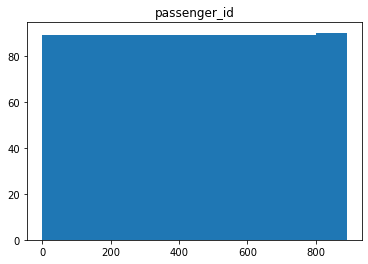

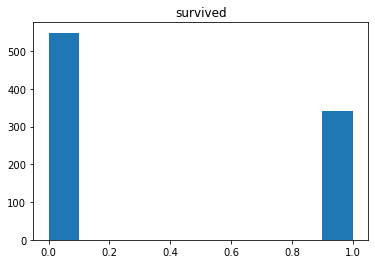

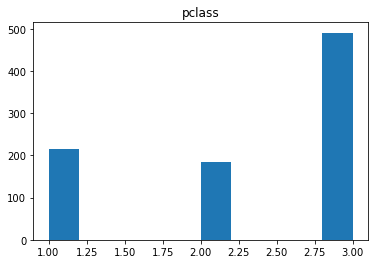

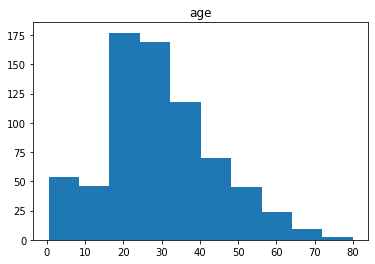

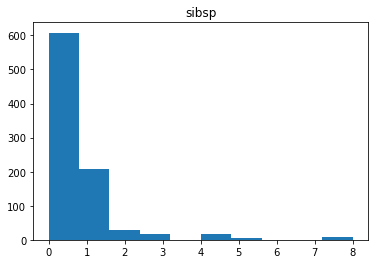

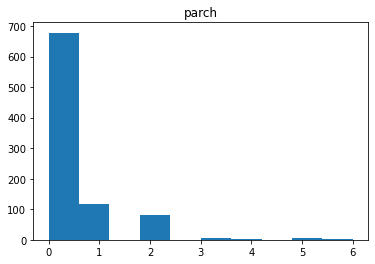

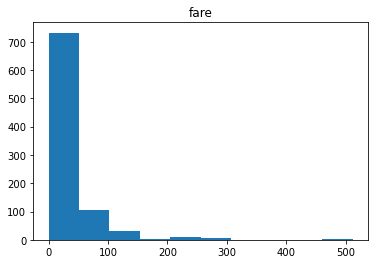

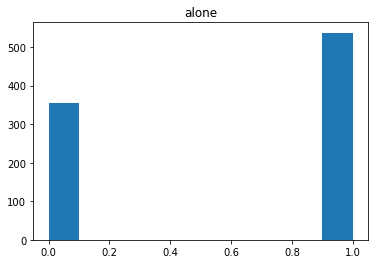

In [7]:
num_cols = df.select_dtypes(include = ["int64","float64"])

for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [8]:
obj_cols = df.select_dtypes(include = "object").columns

for col in obj_cols:
    print(df[col].value_counts())
    print("\n")
    
    print(df[col].value_counts(normalize = True, dropna = False))
    print("---------------------------------\n")

male      577
female    314
Name: sex, dtype: int64


male      0.647587
female    0.352413
Name: sex, dtype: float64
---------------------------------

S    644
C    168
Q     77
Name: embarked, dtype: int64


S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
---------------------------------

Third     491
First     216
Second    184
Name: class, dtype: int64


Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
---------------------------------

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
---------------------------------

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: emb

In [9]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

#### takeaways
1. embarked == embark_town, so remove embarked & keep embark_town
2. class == pclass, so remove class & keep pclass (already numeric)
3. drop deck...way too many missing values
4. fill embark_town with most common value ('Southampton')
5. drop age column
6. encode or create dummy vars for sex & embark_town.

In [10]:
#drop duplicate rows... run just in case
df = df.drop_duplicates()

In [11]:
#drop columns deck, embarked, class, and age
df = df.drop(columns = ["deck","embarked","class","age"])

In [12]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [13]:
# check how many nulls are in each column
df.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
embark_town     2
alone           0
dtype: int64

In [14]:
#look at the value counts for embark_town
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [15]:
df["embark_town"] = df.embark_town.fillna(value = "Southampton")

In [16]:
df.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

#### Encoding
- encoding -- turning a string into a number
##### Two strategies:

- associate each unique value with a number -- label encoding
- one-hot encoding (get_dummies): turn each unique value into a seperate column with either 1 or 0
#### ---------------------
- curse of dimensionality
- when to use one or the other?
- - use the label encoder when the categories have an inherit order
- - use one-hot encoding when there is no order
#### ---------------------
- git dummy vars for sex and embark_town (aka one hot encoding)
#### ---------------------
- dummy_na: create a dummy var for na values, also?
- drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).

In [17]:
# use pd.get_dummies. Returns a dataframe
df_dummy = pd.get_dummies(df[["sex","embark_town"]], drop_first = [True,True])
df_dummy.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [18]:
# append dummy df cols to the original df
df = pd.concat([df,df_dummy], axis = 1)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [19]:
# this is what we did above just condenced into one function
def clean_data(df):
    '''
    This function will drop any duplicate observations, 
    drop columns not needed, fill missing embarktown with 'Southampton'
    and create dummy vars of sex and embark_town. 
    '''
    df.drop_duplicates(inplace=True)
    df.drop(columns=['deck', 'embarked', 'class', 'age'], inplace=True)
    df.embark_town.fillna(value='Southampton', inplace=True)
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    return pd.concat([df, dummy_df], axis=1)

#### sklearn allows us to split our data easily:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 25% validate, 75% train. 

train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.survived)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123, stratify = train.survived)

In [21]:
train.shape, validate.shape, test.shape

((534, 12), (178, 12), (179, 12))

In [22]:
# condencing what we did above into a simple function
def split_titanic_data(df):
    """
    splits the data in train validate and test 
    """
    train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.survived)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.survived)
    
    return train, validate, test


### Option for Missing Values: Impute
Impute: Assign a value to something by inference
Strategies for imputing:
- fill with 0
- fill with the average
- fill with the median
- fill with subgroup mean
- fill with most frequent value
- build a model to predict missing values

We will use sklearn.imputer.SimpleImputer to do this.

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

In [23]:
# define the thing:
imputer = SimpleImputer(strategy = "most_frequent")
imputer

SimpleImputer(strategy='most_frequent')

In [24]:
# fit the thing
imputer = imputer.fit(train[["embark_town"]])
imputer

SimpleImputer(strategy='most_frequent')

In [25]:
# Use the thing (i.e transform)

train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns.

In [26]:
def impute_mode(train, validate, test):
    '''
    impute mode for embark_town
    '''
    imputer = SimpleImputer(strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test


Blend the clean, split and impute functions into a single prep_data() function.

In [27]:
# make a prep function:

def prep_titanic_data(df):
    """
    takes in a data from titanic database, cleans the data, splits the data
    in train validate test and imputes the missing values for embark_town. 
    Returns three dataframes train, validate and test.
    """
    df = clean_data(df)
    train, validate, test = split_titanic_data(df)
    train, validate, test = impute_mode(train, validate, test)
    return train, validate, test

In [28]:
# acquire data again
df = acquire.get_titanic_data()

In [29]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [30]:
# make sure the above function works!

train, validate, test = prep_titanic_data(df)
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sex                      534 non-null    object 
 4   sibsp                    534 non-null    int64  
 5   parch                    534 non-null    int64  
 6   fare                     534 non-null    float64
 7   embark_town              534 non-null    object 
 8   alone                    534 non-null    int64  
 9   sex_male                 534 non-null    uint8  
 10  embark_town_Queenstown   534 non-null    uint8  
 11  embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 43.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1

(None, None, None)

### Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.
2. Drop the species_id and measurement_id columns.
3. Rename the species_name column to just species.
4. Create dummy variables of the species name.
5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [65]:
df = acquire.get_iris_data()

In [50]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [78]:
def clean_iris(df):
    df.drop_duplicates(inplace = True)
    df.rename(columns = {"species_name":"species"}, inplace = True)
    df_dummy = pd.get_dummies(df[["species"]],drop_first = True)
    return pd.concat([df, df_dummy], axis=1)

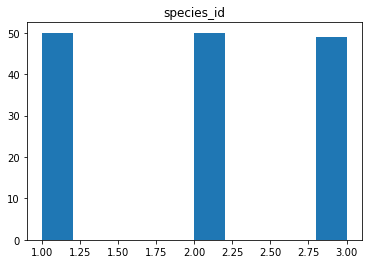

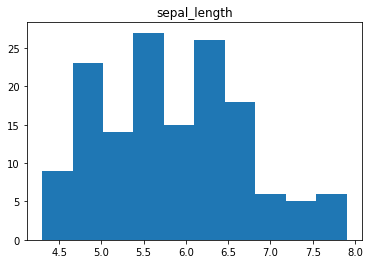

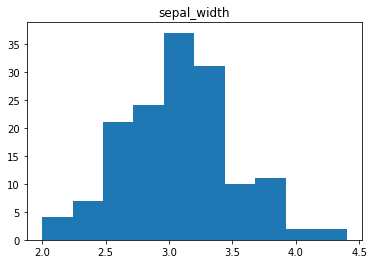

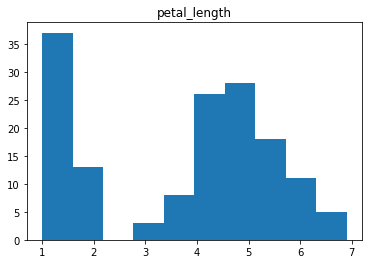

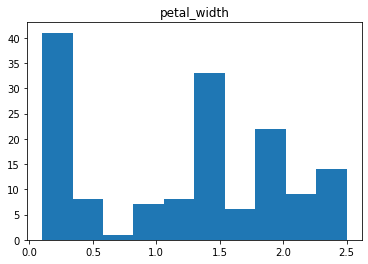

In [79]:
num_cols = df.select_dtypes(include = ["int64","float64"])

for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [80]:
def split_iris_data(df):
    """
    splits the data in train validate and test 
    """
    train, test = train_test_split(df, test_size = .2, random_state = 50, stratify = df.species)
    train, validate = train_test_split(train, test_size=.25, random_state=50, stratify = train.species)
    
    return train, validate, test

In [81]:
def prep_iris_data(df):
    """
    takes in a data from iris database, cleans the data, splits the data
    in train validate test. 
    Returns three dataframes train, validate and test.
    """
    df = clean_iris(df)
    train, validate, test = split_iris_data(df)
    return train, validate, test

In [82]:
prep_iris_data(df)

(     species_id     species  sepal_length  sepal_width  petal_length  \
 49            1      setosa           5.0          3.3           1.4   
 124           3   virginica           6.7          3.3           5.7   
 116           3   virginica           6.5          3.0           5.5   
 119           3   virginica           6.0          2.2           5.0   
 113           3   virginica           5.7          2.5           5.0   
 ..          ...         ...           ...          ...           ...   
 1             1      setosa           4.9          3.0           1.4   
 44            1      setosa           5.1          3.8           1.9   
 109           3   virginica           7.2          3.6           6.1   
 82            2  versicolor           5.8          2.7           3.9   
 144           3   virginica           6.7          3.3           5.7   
 
      petal_width  species_versicolor  species_virginica  
 49           0.2                   0                  0  
 124

In [179]:
df = acquire.get_titanic_data()

In [174]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [161]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

In [162]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [163]:
df["age"] = df.age.fillna(value = 0)

In [164]:
df["age"] = df.age.astype(dtype = "int64")

In [165]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,0,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26,0,0,30.0000,C,First,C,Cherbourg,1


In [166]:
imputer = SimpleImputer(strategy = "mean")

In [167]:
imputer = imputer.fit(df[["age"]])
imputer

SimpleImputer()

In [168]:
df["age"] = imputer.transform(df[["age"]])

In [169]:
df["age"] = df.age.astype(dtype = "int64")

In [170]:
df["age"].isnull().sum()

0

In [144]:
df.age.mean()

29.544332210998878

In [180]:
def clean_data(df):
    '''
    This function will drop any duplicate observations, 
    drop columns not needed, fill missing embarktown with 'Southampton'
    and create dummy vars of sex and embark_town. 
    '''
    df.drop_duplicates(inplace=True)
    df.drop(columns=['deck', 'embarked',"class"], inplace=True)
    df.embark_town.fillna(value='Southampton', inplace=True)
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    return pd.concat([df, dummy_df], axis=1)

In [181]:
clean_data(df)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,1,0,0


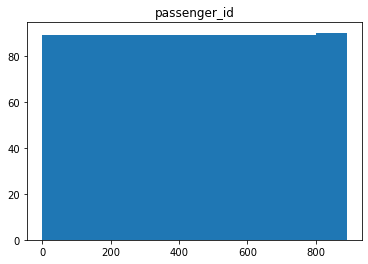

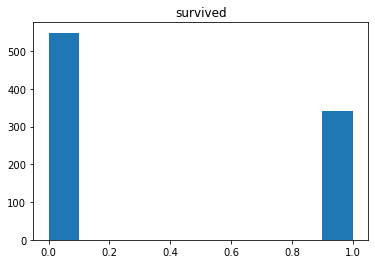

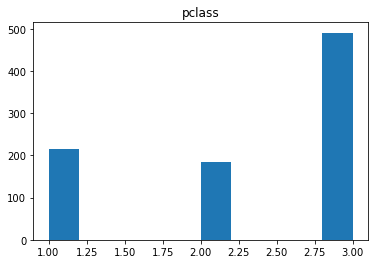

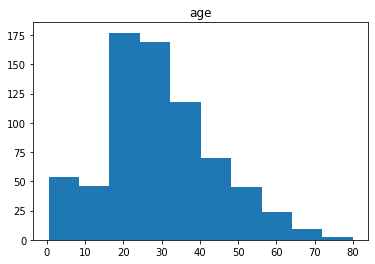

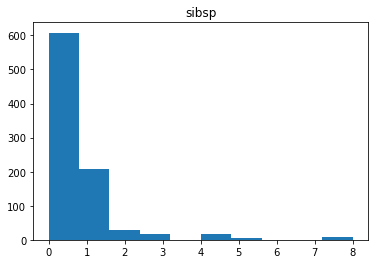

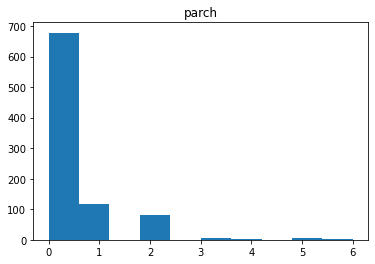

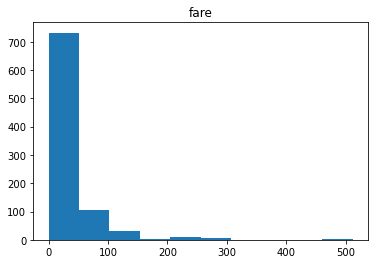

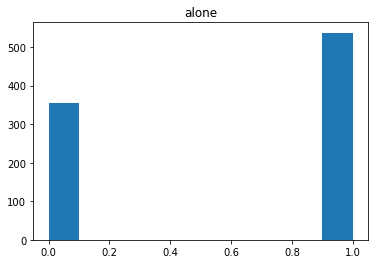

In [182]:
num_cols = df.select_dtypes(include = ["int64","float64"])

for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [183]:
def split_titanic_data(df):
    """
    splits the data in train validate and test 
    """
    train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.survived)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.survived)
    
    return train, validate, test

In [184]:
train,validate,test = split_titanic_data(df)

In [185]:
train.mean()

passenger_id    446.677903
survived          0.383895
pclass            2.323970
age              29.393566
sibsp             0.514981
parch             0.352060
fare             31.058106
alone             0.627341
dtype: float64

In [186]:
validate.mean()

passenger_id    454.646067
survived          0.382022
pclass            2.365169
age              29.141379
sibsp             0.567416
parch             0.460674
fare             32.576146
alone             0.567416
dtype: float64

In [187]:
test.mean()

passenger_id    430.402235
survived          0.385475
pclass            2.206704
age              31.213071
sibsp             0.502793
parch             0.391061
fare             35.253445
alone             0.564246
dtype: float64

In [ ]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test